# Instalando a biblioteca MMDetection
> Selecione no menu `Ambiente de Execução` -> `Alterar o tipo de ambiente de execução` - > no campo `Acelerador de hardware ` escolha `GPU`.

> A biblioteca MMdetection contém diversos algoritmos de detecção de objetos implementados.

> Execute a célula abaixo clicando no símbolo do play para instalar. `demora um pouco :)`

In [ ]:
import os
from os.path import exists, join, basename, splitext

%cd /content
git_repo_url = 'https://github.com/open-mmlab/mmdetection.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  !pip install dicttoxml
  !git clone $git_repo_url
  !pip install -q mmcv-full albumentations #mmcv==0.2.10 albumentations==0.3.2
  !pip install -q terminaltables imagecorruptions 
  !pip install -r {os.path.join(project_name, "requirements.txt")}
  !cd {project_name} && python setup.py develop
import sys
sys.path.append(project_name)

/content
  Created wheel for dicttoxml: filename=dicttoxml-1.7.4-cp37-none-any.whl size=17452 sha256=1128c574b2cfc2cfa097a1f87222671ddaf45a2c45e6ccc28eaa7ad44b5dc2f6
  Stored in directory: /root/.cache/pip/wheels/62/4f/a3/afd4a68f5add45a668c14efa53b64d5cffb2be6bacf993c151
Successfully built dicttoxml
Cloning into 'mmdetection'...
remote: Enumerating objects: 18084, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (144/144), done.
remote: Total 18084 (delta 71), reused 85 (delta 35), pack-reused 17905
Receiving objects: 100% (18084/18084), 21.44 MiB | 35.02 MiB/s, done.
Resolving deltas: 100% (12558/12558), done.
     |████████████████████████████████| 307kB 27.7MB/s 
     |████████████████████████████████| 194kB 44.0MB/s 
     |████████████████████████████████| 634kB 48.7MB/s 
     |████████████████████████████████| 2.1MB 38.2MB/s 
Ignoring pycocotools-windows: markers 'platform_system == "Windows"' don't match your environment
     |█████████████

running develop
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
writing requirements to mmdet.egg-info/requires.txt
writing top-level names to mmdet.egg-info/top_level.txt
writing manifest file 'mmdet.egg-info/SOURCES.txt'
adding license file 'LICENSE' (matched pattern 'LICEN[CS]E*')
reading manifest template 'MANIFEST.in'
writing manifest file 'mmdet.egg-info/SOURCES.txt'
/usr/local/lib/python3.7/dist-packages/torch/utils/cpp_extension.py:369: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
running build_ext
Creating /usr/local/lib/python3.7/dist-packages/mmdet.egg-link (link to .)
Adding mmdet 2.13.0 to easy-install.pth file

Installed /content/mmdetection
Processing dependencies for mmdet==2.13.0
Searching for pycocotools==2.0.2
Best match: pyc

## Reinicie o ambiente após a instalação

> Selecione o menu `Ambiente de execução` -> `Reiniciar ambiente de execução` ou (ctrl+M) e escolha a opção `Sim`.

> Em seguida, execute a célula abaixo clicando no símbolo do play.

In [ ]:
#RESTART RUNTIME

# Check Pytorch installation
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

import pycocotools
#print('Pycoco:',pycocotools.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())
import mmcv
print(mmcv.__version__)

1.8.1+cu101 True
2.13.0
11.0
GCC 7.5
1.3.5


# Acessando o Google Drive para obter acessar as imagens

> Na célula abaixo, vamos executar os comandos para conectar o Colab com o Drive para acessar o diretório contendo as imagens.

> Ao clicar para executar, irá aparecer um `link` (exemplo: Go to this URL in a browser: https://accounts.google.com/...) para permitir o acesso ao seu Drive. 

Clique nesse link.

E na nova janela em que aparece `Escolha uma conta
para prosseguir para Google Drive File Stream` selecione a sua mesma conta do google Colab.

Faça o login (se precisar) e clique em `Permitir` (O app Google Drive File Stream quer acessar sua Conta do Google). 

Copie o código gerado (exemplo 4/1Ay0...) e cole no campo abaixo `Enter your authorization code:`

Pronto! Seu drive está conectado ao colab e irá aparecer do lado esquerdo a pasta `drive`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Definindo as configurações do modelo a ser utilizando

> No exemplo abaixo temos 3 algoritmos de detecção `atss`, `sabl_cascade` e `vfnet`.

>Execute a célula abaixo

In [ ]:
!wget http://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth
#1!wget http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_x101_64x4d_fpn_2x_coco/retinanet_x101_64x4d_fpn_2x_coco_20200131-bca068ab.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/atss/atss_r101_fpn_1x_coco/atss_r101_fpn_1x_20200825-dfcadd6f.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_64x4d_fpn_1x_coco/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/detectors/detectors_htc_r50_1x_coco/detectors_htc_r50_1x_coco-329b1453.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/libra_rcnn/libra_faster_rcnn_x101_64x4d_fpn_1x_coco/libra_faster_rcnn_x101_64x4d_fpn_1x_coco_20200315_231625.log.json
#!wget http://download.openmmlab.com/mmdetection/v2.0/empirical_attention/faster_rcnn_r50_fpn_attention_1111_dcn_1x_coco/faster_rcnn_r50_fpn_attention_1111_dcn_1x_coco_20200130-8b2523a6.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/fp16/faster_rcnn_r50_fpn_fp16_1x_coco/faster_rcnn_r50_fpn_fp16_1x_coco_20200204-d4dc1471.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/ghm/retinanet_ghm_x101_64x4d_fpn_1x_coco/retinanet_ghm_x101_64x4d_fpn_1x_coco_20200131-dd381cef.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/double_heads/dh_faster_rcnn_r50_fpn_1x_coco/dh_faster_rcnn_r50_fpn_1x_coco_20200130-586b67df.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/guided_anchoring/ga_faster_x101_64x4d_fpn_1x_coco/ga_faster_x101_64x4d_fpn_1x_coco_20200215-0fa7bde7.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/fcos/fcos_x101_64x4d_fpn_gn-head_mstrain_640-800_4x2_2x_coco/fcos_x101_64x4d_fpn_gn-head_mstrain_640-800_4x2_2x_coco_20200229-11f8c079.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/foveabox/fovea_align_r101_fpn_gn-head_mstrain_640-800_4x4_2x_coco/fovea_align_r101_fpn_gn-head_mstrain_640-800_4x4_2x_coco_20200208-649c5eb6.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/free_anchor/retinanet_free_anchor_x101_32x4d_fpn_1x_coco/retinanet_free_anchor_x101_32x4d_fpn_1x_coco_20200130-d4846968.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/nas_fpn/retinanet_r50_nasfpn_crop640_50e_coco/retinanet_r50_nasfpn_crop640_50e_coco-0ad1f644.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/fsaf/fsaf_x101_64x4d_fpn_1x_coco/fsaf_x101_64x4d_fpn_1x_coco-e3f6e6fd.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/dynamic_rcnn/dynamic_rcnn_r50_fpn_1x/dynamic_rcnn_r50_fpn_1x-62a3f276.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/carafe/faster_rcnn_r50_fpn_carafe_1x_coco/faster_rcnn_r50_fpn_carafe_1x_coco_bbox_mAP-0.386_20200504_175733-385a75b7.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/dcn/faster_rcnn_x101_32x4d_fpn_dconv_c3-c5_1x_coco/faster_rcnn_x101_32x4d_fpn_dconv_c3-c5_1x_coco_20200203-4f85c69c.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/gn%2Bws/faster_rcnn_x101_32x4d_fpn_gn_ws-all_1x_coco/faster_rcnn_x101_32x4d_fpn_gn_ws-all_1x_coco_20200212-27da1bc2.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/retinanet/retinanet_x101_64x4d_fpn_2x_coco/retinanet_x101_64x4d_fpn_2x_coco_20200131-bca068ab.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/detr/detr_r50_8x2_150e_coco/detr_r50_8x2_150e_coco_20201130_194835-2c4b8974.pth
#!wget https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/vfnet/vfnet_r101_fpn_1x_coco/vfnet_r101_fpn_1x_coco_20201027pth-c831ece7.pth
#!wget https://openmmlab.oss-cn-hangzhou.aliyuncs.com/mmdetection/v2.0/vfnet/vfnet_x101_64x4d_fpn_mdconv_c3-c5_mstrain_2x_coco/vfnet_x101_64x4d_fpn_mdconv_c3-c5_mstrain_2x_coco_20201027pth-b5f6da5e.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_x101_64x4d_fpn_1x_coco/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/sabl/sabl_cascade_rcnn_r101_fpn_1x_coco/sabl_cascade_rcnn_r101_fpn_1x_coco-2b83e87c.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/centripetalnet/centripetalnet_hourglass104_mstest_16x6_210e_coco/centripetalnet_hourglass104_mstest_16x6_210e_coco_20200915_204804-3ccc61e5.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/paa/paa_r101_fpn_2x_coco/paa_r101_fpn_2x_coco_20200821-6829f96b.pth
#!wget http://download.openmmlab.com/mmdetection/v2.0/gfl/gfl_x101_32x4d_fpn_dconv_c4-c5_mstrain_2x_coco/gfl_x101_32x4d_fpn_dconv_c4-c5_mstrain_2x_coco_20200630_102002-14a2bf25.pth

--2021-06-01 14:22:44--  http://download.openmmlab.com/mmdetection/v2.0/yolo/yolov3_d53_mstrain-608_273e_coco/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.252.96.35
Connecting to download.openmmlab.com (download.openmmlab.com)|47.252.96.35|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248093138 (237M) [application/octet-stream]
Saving to: ‘yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’

yolov3_d53_mstrain- 100%[===================>] 236.60M  8.57MB/s    in 29s     

2021-06-01 14:23:14 (8.11 MB/s) - ‘yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth’ saved [248093138/248093138]



In [ ]:
#ADD MODELS
from mmcv import Config
import os
import sys
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

# You can add more model configs like below.
MODELS_CONFIG = {
    # METODOS NOVOS
    'faster': {
        'config_file': 'configs/faster_rcnn/faster_rcnn_x101_64x4d_fpn_1x_coco.py',
        'checkpoint' : '/content/faster_rcnn_x101_64x4d_fpn_1x_coco_20200204-833ee192.pth'
    },
    'yolov3': {
        'config_file': 'configs/yolo/yolov3_d53_mstrain-608_273e_coco.py',
        'checkpoint' : '/content/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth'
    },
     'carafe': {
        'config_file': 'configs/carafe/faster_rcnn_r50_fpn_carafe_1x_coco.py',
        'checkpoint' : '/content/faster_rcnn_r50_fpn_carafe_1x_coco_bbox_mAP-0.386_20200504_175733-385a75b7.pth'
    },
    'retinanet': {
        'config_file': 'configs/retinanet/retinanet_x101_64x4d_fpn_2x_coco.py',
        'checkpoint' : '/content/retinanet_x101_64x4d_fpn_2x_coco_20200131-bca068ab.pth'
    },
     'double_heads': {
        'config_file': 'configs/double_heads/dh_faster_rcnn_r50_fpn_1x_coco.py',
        'checkpoint' : '/content/dh_faster_rcnn_r50_fpn_1x_coco_20200130-586b67df.pth'
    },
    'fsaf': {
        'config_file': 'configs/fsaf/fsaf_x101_64x4d_fpn_1x_coco.py',
        'checkpoint' : '/content/fsaf_x101_64x4d_fpn_1x_coco-e3f6e6fd.pth'
    },
    'vfnet_r50': {
        'config_file': 'configs/vfnet/vfnet_r50_fpn_1x_coco.py',
        'checkpoint' : '/content/drive/MyDrive/AirplaneData/chekpoints/vfnet_r50_fpn_1x_coco_20201027-38db6f58.pth'
    },
    'sabl_r50':{
        'config_file': 'configs/sabl/sabl_cascade_rcnn_r50_fpn_1x_coco.py',
        'checkpoint' : '/content/drive/MyDrive/TrabalhoSAD/checkpoint/sabl_cascade_rcnn_r50_fpn_1x_coco-e1748e5e.pth'
    },
    'paa_r50':{
        'config_file': 'configs/paa/paa_r50_fpn_2x_coco.py',
        'checkpoint' : '/content/drive/MyDrive/AirplaneData/chekpoints/paa_r50_fpn_2x_coco_20200821-c98bfc4e.pth'
    },
    'detr_r50':{
        'config_file': 'configs/detr/detr_r50_8x2_150e_coco.py',
        'checkpoint' : '/content/drive/MyDrive/AirplaneData/chekpoints/detr_r50_8x2_150e_coco_20201130_194835-2c4b8974.pth'
    },
    'atss': {
        'config_file': 'configs/atss/atss_r101_fpn_1x_coco.py',
        'checkpoint' : '/content/atss_r101_fpn_1x_20200825-dfcadd6f.pth'
    },
    'foveabox': {
        'config_file': 'configs/foveabox/fovea_align_r101_fpn_gn-head_mstrain_640-800_4x4_2x_coco.py',
        'checkpoint' : '/content/fovea_align_r101_fpn_gn-head_mstrain_640-800_4x4_2x_coco_20200208-649c5eb6.pth'
    }
    
}

def setCFG(selected_model,data_root,classes,total_epochs=24,learning_rate=0.01):

  # Pick the model you want to use
  # Select a model in `MODELS_CONFIG`.

  # Name of the config file.
  config_file = os.path.join('/content/mmdetection',MODELS_CONFIG[selected_model]['config_file'])

  from mmdet.apis import set_random_seed
  print(config_file)
  cfg = Config.fromfile(config_file)
  cfg.runner.max_epochs = total_epochs

  # Modify dataset type and path
  cfg.data_root = data_root#
  cfg.classes = classes  

  #defining configuration for test dataset
  cfg.data.test.type = cfg.dataset_type
  cfg.data.test.data_root = cfg.data_root
  cfg.data.test.ann_file = '/content/test_json'
  cfg.data.test.classes = cfg.classes
  cfg.data.test.img_prefix = '/content/drive/MyDrive/Doutorado/tree detction/test'

  #defining configuration for train dataset
  cfg.data.train.type = cfg.dataset_type
  cfg.data.train.data_root = cfg.data_root
  cfg.data.train.ann_file = '/content/train_json'
  cfg.data.train.classes = cfg.classes
  cfg.data.train.img_prefix = '/content/drive/MyDrive/Doutorado/tree detction/train'

  #defining configuration for val dataset
  cfg.data.val.type = cfg.dataset_type
  cfg.data.val.data_root = cfg.data_root
  cfg.data.val.ann_file = '/content/val_json'
  cfg.data.val.classes = cfg.classes
  cfg.data.val.img_prefix =  '/content/drive/MyDrive/Doutorado/tree detction/val'
  cfg.data.val.pipeline = cfg.data.train.pipeline

  # modify num classes of the model in box head
  if 'roi_head' in cfg.model:
    #cfg.test_cfg.rcnn['score_thr']= 0.51
    if not isinstance(cfg.model.roi_head.bbox_head,list):
      cfg.model.roi_head.bbox_head['num_classes'] = len(cfg.classes)
    else: 
      for i in range(len(cfg.model.roi_head.bbox_head)):
        cfg.model.roi_head.bbox_head[i]['num_classes'] = len(cfg.classes)
  else:
      cfg.model.bbox_head['num_classes'] = len(cfg.classes)
      print(cfg.model.bbox_head['num_classes'],len(cfg.model.bbox_head))

  # We can still use the pre-trained Mask RCNN model though we do not need to
  # use the mask branch
  cfg.load_from =  MODELS_CONFIG[selected_model]['checkpoint']

  # Set up working dir to save files and logs.
  cfg.work_dir = os.path.join(data_root,'out/''%s'%(selected_model))
  print(cfg.work_dir)
  cfg.total_epochs = total_epochs

  # The original learning rate (LR) is set for 8-GPU training.
  # We divide it by 8 since we only use one GPU.
  cfg.optimizer.lr = learning_rate / 8
  #cfg.lr_config.warmup = None
  #cfg.log_config.interval = 100
  cfg.lr_config.policy = 'step'

  # Change the evaluation metric since we use customized dataset.
  cfg.evaluation.metric = 'bbox'
  # We can set the evaluation interval to reduce the evaluation times
  cfg.evaluation.interval = 1
  # We can set the checkpoint saving interval to reduce the storage cost
  cfg.checkpoint_config.interval = total_epochs/2
  cfg.checkpoint_config.create_symlink=True

  # Set seed thus the results are more reproducible
  cfg.seed = 0
  set_random_seed(0, deterministic=False)
  cfg.gpu_ids = range(1)


  # We can initialize the logger for training and have a look
  # at the final config used for training
  #print(f'Config:\n{cfg.pretty_text}')
  return cfg

#Teste do Dataset
> (OPCIONAL) Na célula abaixo, vamos conferir o conjunto de dados e os retangulos da anotação


/content/mmdetection/configs/yolo/yolov3_d53_mstrain-608_273e_coco.py
1 11
/content/drive/MyDrive/Doutorado/tree detction/out/yolov3
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
/content/drive/MyDrive/Doutorado/tree detction/train/0.png
0  img:


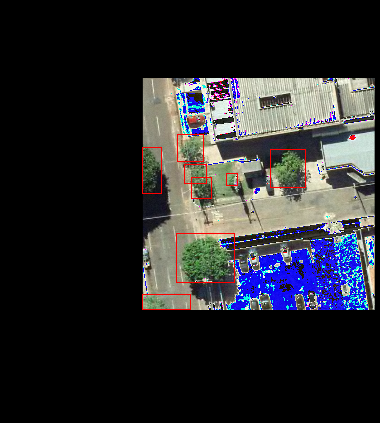

/content/drive/MyDrive/Doutorado/tree detction/train/1.png
1  img:


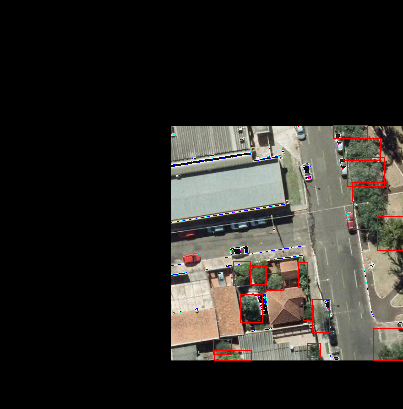

/content/drive/MyDrive/Doutorado/tree detction/train/2.png
2  img:


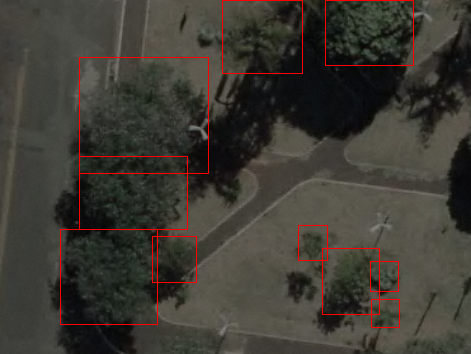

/content/drive/MyDrive/Doutorado/tree detction/train/3.png
3  img:


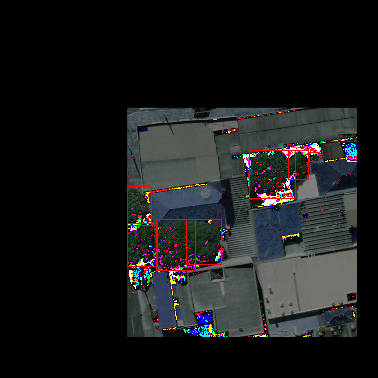

/content/drive/MyDrive/Doutorado/tree detction/train/4.png
4  img:


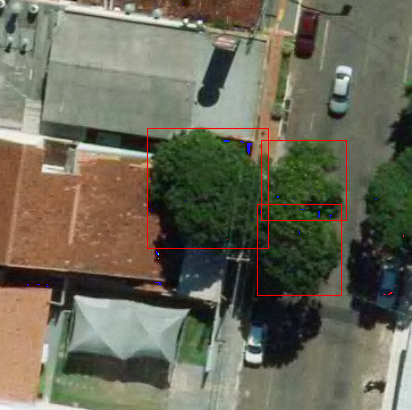

/content/drive/MyDrive/Doutorado/tree detction/train/5.png
5  img:


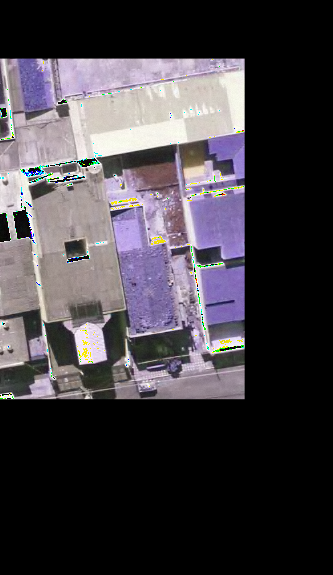

/content/drive/MyDrive/Doutorado/tree detction/train/6.png
6  img:


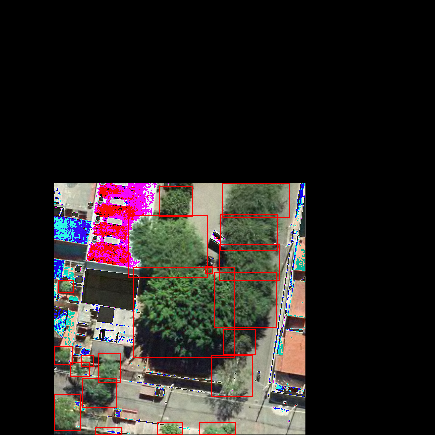

/content/drive/MyDrive/Doutorado/tree detction/train/7.png
7  img:


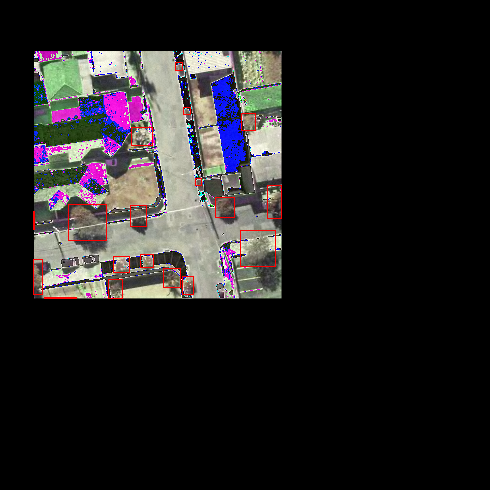

/content/drive/MyDrive/Doutorado/tree detction/train/8.png
8  img:


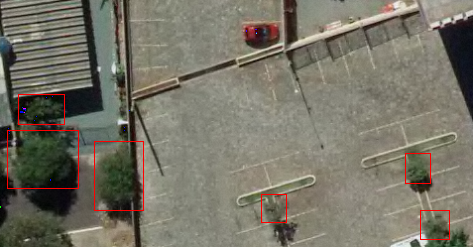

/content/drive/MyDrive/Doutorado/tree detction/train/9.png
9  img:


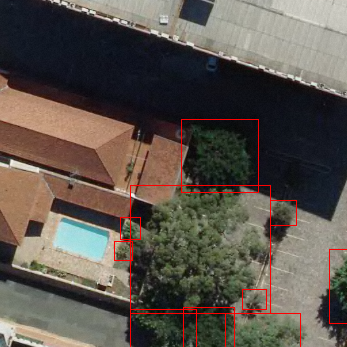

/content/drive/MyDrive/Doutorado/tree detction/train/10.png
10  img:


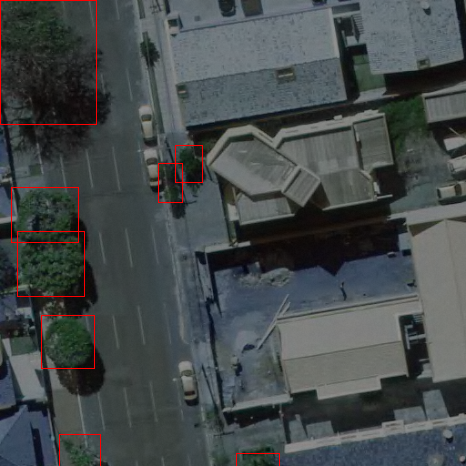

In [ ]:
from mmdet.datasets import build_dataset,build_dataloader
from mmcv import Config
import mmcv
from mmcv.visualization import color_val
import cv2
import os
import torch
import numpy as np
#from mmdet.core import tensor2imgs
from mmcv.image import tensor2imgs
from mmdet.apis import set_random_seed
from google.colab.patches import cv2_imshow

selected_model='yolov3'
cfg = setCFG(selected_model=selected_model,data_root='/content/drive/MyDrive/Doutorado/tree detction',classes=('tree',),total_epochs=24)

dataset = build_dataset(cfg.data.train, dict(test_mode=False,filter_empty_gt=False))
data_loader = build_dataloader(dataset,samples_per_gpu=1,workers_per_gpu=1,num_gpus=1,dist=False,shuffle=False)

img_norm_cfg = cfg.img_norm_cfg

for ims,data in enumerate(data_loader):
  if ims>10:
    break
  img_tensor = data['img'].data[0] 
  img_metas = data['img_metas'].data[0]
  print(img_metas[0]['filename'])
  
  result = data['gt_bboxes'].data[0] 
  
  colors = 'red' #muda a cor da retangulo ('blue', 'red', 'green','yellow')
  colors = [colors for _ in range(len(result))]
  colors = [color_val(c) for c in colors]  

  imgs = tensor2imgs(img_tensor, **img_norm_cfg)
  pos=0
  for img, img_meta in zip(imgs, img_metas):
    h, w, _ = img_meta['img_shape']
    img_show = img[:h, :w, :]
    print(ims,' img:')   
    bboxes = result[pos].numpy().astype(np.int32)
    for j in range(min(20, bboxes.shape[0])):
      left_top = (bboxes[j, 0], bboxes[j, 1])
      right_bottom = (bboxes[j, 2], bboxes[j, 3])
      cv2.rectangle(img_show, left_top, right_bottom, colors[pos], thickness=1)
    pos=pos+1
   
    cv2_imshow(img_show)
  

#Iniciando o treino do modelo

>Vamos então selecionar o modelo e iniciar o treino com o conjunto de treino e validação.


In [ ]:
from mmdet.datasets import build_dataset,build_dataloader
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmdet import __version__
from mmdet.utils import collect_env, get_root_logger
from mmcv.utils import get_git_hash
import torch
import os.path as osp

def trainModel(cfg):
  cfg.workflow = [('train', 1),('val', 1)]

  torch.backends.cudnn.benchmark = True
  distributed = False

  # Create work_dir
  print('Create workdir:',mmcv.mkdir_or_exist(osp.abspath(cfg.work_dir)))

  # dump config
  cfg.dump(osp.join(cfg.work_dir, osp.basename(selected_model+'.py')))
  # init the logger before other steps
  timestamp = time.strftime('%Y%m%d_%H%M%S', time.localtime())
  log_file = osp.join(cfg.work_dir, f'{timestamp}.log')
  logger = get_root_logger(log_file=log_file, log_level=cfg.log_level)

  # init the meta dict to record some important information such as
  # environment info and seed, which will be logged
  meta = dict()
  # log env info
  env_info_dict = collect_env()
  env_info = '\n'.join([(f'{k}: {v}') for k, v in env_info_dict.items()])
  dash_line = '-' * 60 + '\n'
  logger.info('Environment info:\n' + dash_line + env_info + '\n' +
              dash_line)
  meta['env_info'] = env_info
  meta['config'] = cfg.pretty_text
  # log some basic info
  logger.info(f'Distributed training: {distributed}')
  logger.info(f'Config:\n{cfg.pretty_text}')

  # set random seeds
  meta['seed'] = cfg.seed
  meta['exp_name'] = osp.basename(selected_model+'.py')


  # Build dataset
  datasets = [build_dataset(cfg.data.train,dict(test_mode=False,filter_empty_gt=False))]
  datasets.append(build_dataset(cfg.data.val,dict(test_mode=False,filter_empty_gt=False)))


  datasets[0].CLASSES = cfg.classes
  datasets[1].CLASSES = cfg.classes

  cfg.checkpoint_config.meta = dict(
              mmdet_version=__version__ + get_git_hash()[:7],
              CLASSES=datasets[0].CLASSES)

  # Build the detector
  #model = build_detector(
  #    cfg.model)
  model = build_detector(cfg.model,train_cfg=cfg.get('train_cfg'),test_cfg=cfg.get('test_cfg'))
  # Add an attribute for visualization convenience
  model.CLASSES = datasets[0].CLASSES

  train_detector(model, datasets, cfg, distributed=False, validate=False,timestamp=timestamp,meta=meta)


## Executando o treino E escolhendo o modelo
> Na célula abaixo estamos enviando as configurações para realizar o treino. 


1.   `selected_model`: o modelo selecionado
2.   `data_root`:  a pasta contendo todas as imagens
3.   `classes`: lista com o nome das classes do nosso problema (mesma ordem da anotação)
4.   `total_epochs`: número de épocas (iterações) a rodar o treino
5.   `learning_rate`: taxa de aprendizagem, o quanto vamos ajustar os valores dos filtros para tentar encontrar os melhores valores dos filtros. Geralmente é um valor bem pequeno 0.2 ... 0.001

> Esses dois últimos parâmetros (4. e 5.) podemos alterar para tentar melhorar o resultado do nosso algoritmo de detecção.



In [ ]:
selected_model='yolov3'
cfg = setCFG(selected_model=selected_model,data_root='/content/drive/MyDrive/Doutorado/tree detction',classes=('tree',),total_epochs=24)
trainModel(cfg)
print(selected_model)

/content/mmdetection/configs/yolo/yolov3_d53_mstrain-608_273e_coco.py
1 11
/content/drive/MyDrive/Doutorado/tree detction/out/yolov3
Create workdir: None


2021-06-01 14:34:15,745 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
CUDA available: True
GPU 0: Tesla T4
CUDA_HOME: /usr/local/cuda
NVCC: Build cuda_11.0_bu.TC445_37.28845127_0
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.8.1+cu101
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v1.7.0 (Git Hash 7aed236906b1f7a05c0917e5257a1af05e9ff683)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_70,code=sm_70
  - CuDNN 7.6.3
  - Magma 2.5.2
  - Build settings: BLAS_INFO

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


/content/mmdetection/mmdet/models/backbones/darknet.py:137: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
2021-06-01 14:34:30,090 - mmdet - INFO - load checkpoint from /content/yolov3_d53_mstrain-608_273e_coco_20210518_115020-a2c3acb8.pth
2021-06-01 14:34:30,096 - mmdet - INFO - Use load_from_local loader
2021-06-01 14:34:30,281 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for bbox_head

yolov3


In [ ]:
!python /content/mmdetection/tools/analysis_tools/analyze_logs.py plot_curve '/content/20201214_172104.log.json' --keys loss --legend loss --out "/content/retina_loss.png"

plot curve of /content/20201214_172104.log.json, metric is loss
save curve to: /content/retina_loss.png


# Testando o modelo Treinado
> Na célula abaixo vamos iniciar a função que realizará o teste das imagens

In [ ]:
from mmdet.apis import inference_detector, init_detector, show_result_pyplot
from mmdet.datasets import replace_ImageToTensor
from mmdet.datasets import CocoDataset
from mmcv.visualization import color_val
from mmdet.core import visualization as vis

import mmcv, torch
import numpy as np
import cv2

from google.colab.patches import cv2_imshow

def testingModel(cfg=None,typeN='test',models_path=None,show_imgs=False,save_imgs=False,path_out=None):
  
  # build the model from a config file and a checkpoint file
  cfg.data.test.test_mode = True
  torch.backends.cudnn.benchmark = True
  cfg.model.pretrained = None
  outpath=path_out

  modelx = init_detector(cfg, models_path)
  
  if typeN=='test':
    ann_file = cfg.data.test.ann_file
    img_prefix = cfg.data.test.img_prefix
    cfg.data.test.pipeline = replace_ImageToTensor(cfg.data.test.pipeline)
  elif typeN=='validation':
    ann_file = cfg.data.val.ann_file
    img_prefix = cfg.data.val.img_prefix  
  elif typeN=='train':
    ann_file = cfg.data.train.ann_file
    img_prefix = cfg.data.train.img_prefix  

  coco_dataset = CocoDataset(ann_file=ann_file, classes=cfg.classes,data_root=cfg.data_root,img_prefix=img_prefix,pipeline=cfg.train_pipeline,filter_empty_gt=False)

  results=[]
  for i,dt in enumerate(coco_dataset.data_infos):
    imagex=None
    imagex=mmcv.imread(os.path.join(coco_dataset.img_prefix,dt['file_name']))
    
    resultx = inference_detector(modelx, imagex)

    if show_imgs and i<44: ## VAI MOSTRAR APENAS 10 IMAGENS PARA NÃO FICAR LENTO!
      print(dt['file_name'])

      

      '''#GT BBOXS VERMELHOS      
      ann = coco_dataset.get_ann_info(i)
      bboxes = np.insert(ann['bboxes'],4,0.91,axis=1)

      vis.imshow_gt_det_bboxes(imagex,dict(gt_bboxes=bboxes, gt_labels=np.repeat(1, len(bboxes))), resultx, show=True,score_thr=0.5)

      for j in range(min(20, bboxes.shape[0])):
        left_top = (bboxes[j, 0], bboxes[j, 1])
        right_bottom = (bboxes[j, 2], bboxes[j, 3])
        imagex=cv2.rectangle(imagex, left_top, right_bottom, color_val('red'), thickness=2)'''
      
      #RESULTADOS BBOXS VERDES
    bboxes = resultx[0]
    for j in range(min(20, bboxes.shape[0])):
      #bboxes[j, 1] /= 1.35;
      left_top = ( int(bboxes[j, 0]), int(bboxes[j, 1]) )
      right_bottom = ( int(bboxes[j, 2]), int(bboxes[j, 3]) )
      imagex=cv2.rectangle(imagex, left_top, right_bottom, (0, 0, 255), 4)
      print(dt['file_name'])
      #cv2_imshow(imagex)
      
      #cv2_imshow(imagex)
    results.append(resultx)
    outfilename = os.path.join(outpath,dt['file_name'])
    cv2.imwrite(outfilename, imagex) 

  eval_results = coco_dataset.evaluate(results, classwise=True)
  print(eval_results)
  #print(selected_model,'\t',eval_results['bbox_mAP_50'])
  string_results = selected_model+'\t'+str(eval_results['bbox_mAP_50'])
  return string_results

## Executando o teste e visualizando as imagens com as deteções
> Ao clicar na célula todas as imagens do conjunto de `test` serão executadas e mostrado as caixas preditas (cor verde) e as caixas da anotação (vermelha)

> É apresentado também o resultado de classificação em `category | AP` mostrado a taxa de acerto de cada classe. O maior valor é 1.0 (100% de acerto).

In [ ]:
selected_model='yolov3'
cfg = setCFG(selected_model=selected_model,data_root='/content/drive/MyDrive/Doutorado/tree detction',classes=('tree',),total_epochs=24)
pth ='/content/drive/MyDrive/Doutorado/tree detction/out/yolov3/latest.pth'
print(pth)
testingModel(cfg=cfg,typeN='test',models_path=pth,show_imgs=True,path_out='/content/drive/MyDrive/Doutorado/tree detction/out/yolov3')

/content/mmdetection/configs/yolo/yolov3_d53_mstrain-608_273e_coco.py
1 11
/content/drive/MyDrive/Doutorado/tree detction/out/yolov3
/content/drive/MyDrive/Doutorado/tree detction/out/yolov3/latest.pth
Use load_from_local loader


/content/mmdetection/mmdet/datasets/utils.py:68: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
176.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
177.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
178.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
179.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
180.png
181.png
181.png
181.png
181.png
181.png
181.png
181.png
181.png
181.png
181.p

'yolov3\t0.591'